# Import libraries and setup

In [1]:
# Import libraries we may need
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import scanpy.external as sce
import wget
import yaml
import wget
import astir
import dill
import umap
import fa2
reducer = umap.UMAP()

#My module for importing IMC data into AnnData format
import mikeimc as mimc
import mikeimc_v2 as mikeimc_v2

In [2]:
# Set up output figure settings
plt.rcParams['figure.figsize']=(64,64) #rescale figures, increase sizehere

# Set up scanpy settings
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100, dpi_save=300) #Increase DPI for better resolution figures
#sc.logging.print_versions()

# Save / restore environemnt
Use these functions to either save or load the environmental variables, otherwise you will lose all the objects between opening/closing Jupyter sessions!

In [8]:
#save the session
dill.dump_session('DC_notebook_iteration3_SCANPY2.db')

In [3]:
#load the session
dill.load_session('DC_notebook_iteration3_SCANPY.db')

In [ ]:
#including functional markers
myeloid_markers2 = ['Arginase1', 'CD11b','CD11c','CD14','CD163','CD16','CD206','CD45','CD66b','CD68','Iba1', 'CD74','MHCII','MHCI','Vista', 
                   'iNOS', 'CD107a','GranzymeB', 'ClvCaspase3', 'SARSCoV2']
adata_myeloid_3 = adata_myeloid[:,myeloid_markers2].copy()

lymphoid_markers2 = ['CD3','CD4','CD8', 'CD20','CD38','CD74','MHCII','MHCI', 'Foxp3','CD107a','GranzymeB','ClvCaspase3','SARSCoV2']
adata_lymphoid_3 = adata_lymphoid[:,lymphoid_markers2].copy()

epithelial_markers2 = ['PanCK','CD74','MHCII','MHCI','CD107a','GranzymeB','ClvCaspase3','SARSCoV2']
adata_epithelial_3 = adata_epithelial[:,epithelial_markers2].copy()

fibroblast_markers2 = ['Collagen1','SMA', 'Fibrinogen','ClvCaspase3','SARSCoV2']
adata_fibroblast_3 = adata_fibroblast[:,fibroblast_markers2].copy()

endothelial_markers2 = ['CD31','ICAM1','vWF','CD74','MHCII','MHCI','CD107a','GranzymeB','SARSCoV2']
adata_endothelium_3 = adata_endothelium[:,endothelial_markers2].copy()

RBC_markers2 = ['CD235ab','SARSCoV2']
adata_RBC_3 = adata_RBC[:,RBC_markers2].copy()

# Analysis of Myeloid cells

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_myeloid_3, n_neighbors=100)

In [ ]:
#Calculate UMAP - changed after running paga - see below
sc.tl.umap(adata_myeloid_3)

In [ ]:
adata_myeloid_3

In [ ]:
adata_myeloid_3.var_names

In [ ]:
#Plot UMAP
sc.pl.umap(adata_myeloid_3, size=5, color=['ROI'], save='_myeloid_ROI_v2.pdf')

In [ ]:
#Plot UMAP
sc.pl.umap(adata_myeloid_3, size=5, color=['Type'], save='_myeloid_Type_v2.pdf')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_myeloid_3, size=5, color=['Arginase1','CD11b', 'CD66b', 'Vista', 'GranzymeB', 'ClvCaspase3','CD14', 'CD16', 'Iba1', 'CD68', 'CD163', 'CD206',
                                           'SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a'], save='_myeloid_Markers_v2.pdf')

In [ ]:
#Run PCA
sc.tl.pca(adata_myeloid_3)

#Calculate tSNE
sc.tl.tsne(adata_myeloid_3)

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_myeloid_3, size=5, color=['ROI'], save='_myeloid_ROI_v2.pdf')

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_myeloid_3, size=5, color=['Type'], save='_myeloid_cases_v2.pdf')

In [ ]:
#Plot tSNE for each marker
sc.pl.tsne(adata_myeloid_3, size=5, color=adata_myeloid_3.var_names, save='_myeloid_Markers_v2.pdf')

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_myeloid_3, clustering_algo="louvain", k=200, seed=1234)

In [ ]:
#Plot PhenoGraph on tSNE
sc.pl.tsne(adata_myeloid_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_myeloid_PhenoLouvain_v2.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_myeloid_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_myeloid_PhenoLouvain_v2.pdf')

In [ ]:
#Plot heatmap of myeloid clusters
sc.tl.dendrogram(adata_myeloid_3, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_myeloid_3, adata_myeloid_3.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_myeloid_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_myeloid_norm3 = adata_myeloid_3.copy()
sc.pp.scale(adata_myeloid_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_myeloid_norm3, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_myeloid_norm3, adata_myeloid_norm3.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_myeloid_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#differential testing using t-test,  Wilcoxon rank-sum (Mann-Whitney-U) or logistic regression 
#The essential difference is that here, we use a multi-variate approach whereas conventional differential tests are uni-variate. 
sc.tl.rank_genes_groups(adata_myeloid_3, 'pheno_louvain', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_myeloid_3, n_genes=10, sharey=False, save='rank_markers_myeloid_PhenoLouvain_v2.pdf')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_myeloid_3.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_myeloid_3,'pheno_louvain',['ROI','Type'])

# Mapping new myeloid names after clusters have been merged
I've merged several populations - REMEMBER OF THE NEW CLUSTER'S ANNOTATIONS

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

myeloid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_myeloid_dict.csv')
m = myeloid_dict.set_index('pheno_louvain').to_dict()

adata_myeloid_3.obs['myeloid_pop']=adata_myeloid_3.obs['pheno_louvain'].map(m['Myeloid_Class'])

adata_myeloid_3.obs['myeloid_pop']=adata_myeloid_3.obs['myeloid_pop'].astype('category')

In [ ]:
mimc.pop_distribution(adata_myeloid_3,'myeloid_pop',['ROI','Case','Type'])

In [ ]:
adata_myeloid_3.obs['Case']

In [ ]:
adata_myeloid_4 = adata_myeloid_3[~adata_myeloid_3.obs['Type'].isin(['Non_COVID'])]

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(adata_myeloid_4.obs['myeloid_pop'],adata_myeloid_4.obs['Type'], margins=False, margins_name='Total', normalize='columns') 
#normalize='columns')

In [ ]:
tmp2 = pd.DataFrame.transpose(tmp)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')
#colour_palette['colour']
tmp2.plot.bar(stacked=True, color=colour_palette['colour'], rot=0, figsize=(6, 6)).legend(bbox_to_anchor=(1, 1)) #use figsize=(16,6) for ROI

Abundances graphs with stats Example of case averaging abundance stats

In [ ]:
adata_myeloid_4

In [ ]:
pretty_colors = ['#F08080','#87CEFA']
pretty_colors2 = ['#FA8072','#92C7F9']
color_pal = sb.color_palette(pretty_colors2)

In [ ]:
tmp = pd.crosstab(adata_myeloid_4.obs['myeloid_pop'],adata_myeloid_4.obs['Type'], margins=False, margins_name='Total')

In [ ]:
#Grouped bar plot with Pandas
tmp.plot.bar(stacked=False, color=pretty_colors2, width=0.8, figsize=(8, 4), rot=90).legend(bbox_to_anchor=(1, 1))
plt.ylabel("No of cells/mm2")

In [ ]:
cells = pd.crosstab([adata_myeloid_4.obs['Type'], adata_myeloid_4.obs['ROI']],adata_myeloid_4.obs['myeloid_pop'])
cells.columns=cells.columns.astype('str')        

In [ ]:
cells

In [ ]:
cells_long

In [ ]:
# Grouped bar plot with Pandas
cells_long = cells.reset_index().melt(id_vars=['Type','ROI'])
    
fig, ax = plt.subplots(figsize=(8,4))
sb.barplot(data = cells_long, y = "value", x = 'myeloid_pop', hue='Type', width=0.8, palette = pretty_colors2, ci=68, ax=ax, saturation=1, capsize=.1, errcolor=".0", linewidth=2, edgecolor=".0")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 18)
ax.set_ylabel('Cells/mm2')
ax.legend(bbox_to_anchor=(0.22, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Type']:

    mikeimc_v2.grouped_graph(adata_myeloid_4,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='myeloid_pop',
                             fig_size=(8, 4),
                             log_scale=False, scale_factor=True,
                            display_tables=True, crosstab_norm=False) #If you change display_tables to True, will also do stats on the groups
    # use crosstab_norm='columns' to plot and do statistics based on cell frequencies per group
    plt.show()

In [ ]:
#Plot heatmap of myeloid clusters
sc.tl.dendrogram(adata_myeloid_3, groupby = 'myeloid_pop')
sc.pl.heatmap(adata_myeloid_3, adata_myeloid_3.var_names, groupby='myeloid_pop', cmap='viridis', swap_axes=False, dendrogram=True, save='_myeloid_annotated_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_myeloid_norm3 = adata_myeloid_3.copy()
sc.pp.scale(adata_myeloid_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_myeloid_norm3, groupby = 'myeloid_pop')
sc.pl.heatmap(adata_myeloid_norm3, adata_myeloid_norm3.var_names, groupby='myeloid_pop', swap_axes=False, dendrogram=True, save='_scaled_myeloid_annotated_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#To identify differentially expressed genes we run sc.tl.rank_genes_groups. 
#This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. 
sc.tl.rank_genes_groups(adata_myeloid_3, 'myeloid_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)

In [ ]:
sc.pl.rank_genes_groups(adata_myeloid_3, n_genes=10, sharey=False, save='myeloid_annotated_wilcoxon.pdf')

In [ ]:
#sc.tl.rank_genes_groups(adata_myeloid_3, 'Type', reference='Non_COVID', method='wilcoxon', corr_method='benjamini-hochberg', pts=True, )

In [ ]:
sc.pl.rank_genes_groups(adata_myeloid_3, n_genes=10, sharey=False)

In [ ]:
adata_myeloid_3.uns['rank_genes_groups']

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_myeloid_3.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_myeloid_annotated_clusters.csv') 
df.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_myeloid_3, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_myeloid_3, split=False, groups=['Virus-infected Alveolar Macrophage'], gene_names=['CD74'], save='CD74_expression_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_myeloid_3, groups=['Virus-infected Alveolar Macrophage'], split=True, gene_names=['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB']) 

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata_myeloid_3, n_genes=3,use_raw=False, swap_axes=True, show_gene_labels=True,
                                cmap='bwr') #save='myeloid_heatmap_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_myeloid_3, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='myeloid_logFC_wilcoxon_v2.pdf' )

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_myeloid_3, n_genes=8, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='myeloid_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_myeloid_3, groups=['Alveolar Macrophage', 
                                                 'Virus-infected Alveolar Macrophage', 'Interstitial Macrophage', 'CD14highCD16-, Classical Monocyte','CD14+CD16+, Intermediate Monocyte'], n_genes=8, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='macrophage_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_myeloid_3, var_names=['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='myeloid_specificmarkers_logFC_wilcoxon.pdf')

In [ ]:
virus_mac = sc.tl.rank_genes_groups(adata_myeloid_3, 'myeloid_pop', groups=['Virus-infected Alveolar Macrophage'], reference='Alveolar Macrophage', method='wilcoxon')
sc.pl.rank_genes_groups_violin(virus_mac, groups=['Virus-infected Alveolar Macrophage'], n_genes=6)

In [ ]:
sc.pl.violin(adata_myeloid_3, ['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB'], groupby='myeloid_pop', save='myeloid_specificmarkers_wilcoxon.pdf')

In [ ]:
sc.pl.dotplot(adata_myeloid_3, adata_myeloid_3.var_names, groupby='myeloid_pop', dendrogram=True)

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_myeloid_3, color = "myeloid_pop", s = 2, legend_fontsize=12, legend_fontweight='semibold',legend_loc='on data', size=2, frameon=False, save='_myeloid_annotated_v2.pdf')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_myeloid_3, color = "myeloid_pop", s = 100, legend_fontsize = 10, legend_fontweight='semibold',legend_loc='on data', size=3, frameon=True, save='_myeloid_annotated_v2.pdf')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_myeloid_3, color=adata_myeloid_3.var_names,size=5, cmap='viridis', vmax=1, save='_myeloid_Markers_v2.pdf')

In [ ]:
#Mapping out the coarse-grained connectivity structures of complex manifolds
#By quantifying the connectivity of partitions (groups, clusters) of the single-cell graph, 
#partition-based graph abstraction (PAGA) generates a much simpler abstracted graph (PAGA graph) of partitions,
#in which edge weights represent confidence in the presence of connections.

#Calculate PAGA
sc.tl.paga(adata_myeloid_3, groups='myeloid_pop')

In [ ]:
adata_myeloid_3

In [ ]:
#Plot PAGA
#Plot the PAGA graph through thresholding low-connectivity edges.
#Compute a coarse-grained layout of the data. 
#Reuse this by passing init_pos='paga' to umap() or draw_graph() and obtain embeddings with more meaningful global topology [Wolf19].
#This uses ForceAtlas2 or igraph’s layout algorithms for most layouts
#By tresholding this confidence in paga(), a much simpler representation of the manifold data is obtained, 
#which is nonetheless faithful to the topology of the manifold.
#'SARSCoV2', 'MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB'
sc.pl.paga(adata_myeloid_3, color=['myeloid_pop'], layout='fr', node_size_scale=1, node_size_power=1, edge_width_scale=0.8, fontweight='normal',fontsize=8,save='myeloid_pop.pdf', threshold=0.3)

In [ ]:
markers=['SARSCoV2','MHCI','MHCII','CD74',
       'CD107a','GranzymeB']
for i in markers:
    sc.pl.paga(adata_myeloid_3, color=i, title=i, node_size_scale=1, node_size_power=1, edge_width_scale=0.8, fontweight='normal', fontsize=8, cmap='viridis', save=i, threshold=0.3)

In [ ]:
#Force-directed graph drawing
#An alternative to tSNE that often preserves the topology of the data better
sc.tl.draw_graph(adata_myeloid_3, init_pos='paga', layout='fa')

In [ ]:
# Single cell graph
sc.pl.draw_graph(adata_myeloid_3, layout='fa', color=['myeloid_pop','SARSCoV2','MHCI','MHCII','CD74','CD107a','GranzymeB'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=3, frameon=True, save="_myeloid.pdf")

In [ ]:
#Pseudo time attempt
#Together with a random walk-based distance measure (e.g. scanpy.tl.dpt()) 
#this generates a partial coordinatization of data useful for exploring and explaining its variation.

adata_myeloid_3.uns['iroot'] = np.flatnonzero(adata_myeloid_3.obs['myeloid_pop']  == 'Alveolar Macrophage')[0]
sc.tl.dpt(adata_myeloid_3)
sc.pl.draw_graph(adata_myeloid_3, color=['dpt_pseudotime'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=5, frameon=True, save='_pseudotime_myeloid.pdf')

In [ ]:
scanpy.pl.dpt_groups_pseudotime

In [ ]:
scanpy.pl.dpt_timeseries

In [ ]:
# Set `skip_data=False` if you also want to export the data.
adata_myeloid_3.write_csvs(dirname='./Analysis_iteration3/All_data_v2_noDNAphysicalparam/ASTIR/Myeloid_clusters/Annotated_clusters', skip_data=False)

In [ ]:
#see how to increase the size of the dots
#edit dict colour
graph = sb.lmplot(data = adata_myeloid_3.obs, x = 'X_loc',y='Y_loc',hue ='myeloid_pop', height = 6, col = 'ROI', col_wrap = 4,fit_reg = False)

In [ ]:
graph.savefig('1.png')

# Analysis of Macrophages and Neutrophils separately

In [ ]:
#load the session
#dill.load_session('DC_notebook_env_iteration3_ASTIR.db')

In [ ]:
#Analysis based on macrophage-virus+ vs macrophage-virus-
adata_macrophage = adata_subset3[adata_subset3.obs['cell_type'].isin(['Macrophage'])].copy()
sc.pl.heatmap(adata_macrophage, adata_macrophage.var_names, groupby='cell_type', swap_axes=True, vmax=0.75)

adata_neutrophil = adata_subset3[adata_subset3.obs['cell_type'].isin(['Neutrophil'])].copy()
sc.pl.heatmap(adata_neutrophil, adata_neutrophil.var_names, groupby='cell_type', swap_axes=True, vmax=0.75)

In [ ]:
#including functional markers
macrophage_markers = ['CD11c','CD14','CD163','CD16','CD206','CD45','CD68','Iba1', 'CD74','MHCII','MHCI','Vista', 
                   'iNOS', 'CD107a','GranzymeB', 'ClvCaspase3', 'SARSCoV2']
adata_macrophage_2 = adata_macrophage[:,macrophage_markers].copy()

neutrophil_markers = ['Arginase1','CD11b','CD66b', 'CD16','CD74','MHCII','MHCI','Vista','iNOS', 'CD107a','GranzymeB', 'ClvCaspase3', 'SARSCoV2']
adata_neutrophil_2 = adata_neutrophil[:,neutrophil_markers].copy()

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_macrophage_2, n_neighbors=100)

#Calculate UMAP
sc.tl.umap(adata_macrophage_2)

In [ ]:
#Run PCA
sc.tl.pca(adata_macrophage_2)

#Calculate tSNE
sc.tl.tsne(adata_macrophage_2)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_macrophage_2, color=['ROI'], size=5, save='_macrophage_ROI.pdf')

In [ ]:
sc.pl.umap(adata_macrophage_2, color=['Type'], size=5, save='_macrophage_Type.pdf')

In [ ]:
sc.pl.umap(adata_macrophage_2, color=adata_macrophage_2.var_names, size=20, save='_macrophage_Markers.pdf')

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_macrophage_2, color=['ROI'], save='_macrophage_ROI.pdf')

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_macrophage_2, color=['Type'], save='_macrophage_Type.pdf')

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_macrophage_2, color=adata_macrophage_2.var_names, save='_macrophage_Markers.pdf')

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_macrophage_2, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot heatmap of macrophage clusters
sc.tl.dendrogram(adata_macrophage_2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_macrophage_2, adata_macrophage_2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_macrophage_PhenoLouvain_clustered.pdf')

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

macrophage_dict = pd.read_csv('mikeimc_approach/covid_macrophage_dict.csv')
mac = macrophage_dict.set_index('pheno_louvain').to_dict()

adata_macrophage_2.obs['mac_pop']=adata_macrophage_2.obs['pheno_louvain'].map(mac['Myeloid_Class'])

adata_macrophage_2.obs['mac_pop']=adata_macrophage_2.obs['mac_pop'].astype('category')

In [ ]:
#Plot heatmap of macrophage clusters
sc.tl.dendrogram(adata_macrophage_2, groupby = 'mac_pop')
sc.pl.heatmap(adata_macrophage_2, adata_macrophage_2.var_names, groupby='mac_pop', swap_axes=False, dendrogram=True, save='_macrophage_annotated.pdf')

In [ ]:
#Calculate PAGA
sc.tl.paga(adata_macrophage_2, groups='mac_pop')

In [ ]:
sc.pl.paga(adata_macrophage_2, color=['mac_pop'], layout='fr', node_size_scale=1, node_size_power=1, edge_width_scale=0.8, fontweight='normal',fontsize=8,save='mac_pop.pdf', threshold=0.3)

In [ ]:
#Force-directed graph drawing
#An alternative to tSNE that often preserves the topology of the data better
sc.tl.draw_graph(adata_macrophage_2, init_pos='paga', layout='fa')

In [ ]:
# Single cell graph
sc.pl.draw_graph(adata_macrophage_2, layout='fa', color=['mac_pop','SARSCoV2','MHCI','MHCII','CD74','CD107a','GranzymeB'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=3, frameon=True, save="_macrophage.pdf")

In [ ]:
#Pseudo time attempt
#Together with a random walk-based distance measure (e.g. scanpy.tl.dpt()) 
#this generates a partial coordinatization of data useful for exploring and explaining its variation.

adata_macrophage_2.uns['iroot'] = np.flatnonzero(adata_macrophage_2.obs['mac_pop']  == 'Classical Monocyte')[0]
sc.tl.dpt(adata_macrophage_2)
sc.pl.draw_graph(adata_macrophage_2, color=['dpt_pseudotime'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=5, frameon=True, save='_pseudotime_macrophage.pdf')

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_neutrophil_2, n_neighbors=100)

#Calculate UMAP
sc.tl.umap(adata_neutrophil_2)

In [ ]:
#Run PCA
sc.tl.pca(adata_neutrophil_2)

#Calculate tSNE
sc.tl.tsne(adata_neutrophil_2)

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_neutrophil_2, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot heatmap of myeloid clusters
sc.tl.dendrogram(adata_neutrophil_2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_neutrophil_2, adata_neutrophil_2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_neutrophils_PhenoLouvain_clustered.pdf')

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

neutro_dict = pd.read_csv('mikeimc_approach/covid_neutro_dict.csv')
n = neutro_dict.set_index('pheno_louvain').to_dict()

adata_neutrophil_2.obs['neutro_pop']=adata_neutrophil_2.obs['pheno_louvain'].map(n['Myeloid_Class'])

adata_neutrophil_2.obs['neutro_pop']=adata_neutrophil_2.obs['neutro_pop'].astype('category')

In [ ]:
#Plot heatmap of myeloid clusters
sc.tl.dendrogram(adata_neutrophil_2, groupby = 'neutro_pop')
sc.pl.heatmap(adata_neutrophil_2, adata_neutrophil_2.var_names, groupby='neutro_pop', swap_axes=False, dendrogram=True, save='_neutrophils_annotated.pdf')

In [ ]:
#Calculate PAGA
sc.tl.paga(adata_neutrophil_2, groups='neutro_pop')

In [ ]:
sc.pl.paga(adata_neutrophil_2, color=['neutro_pop'], layout='fr', node_size_scale=1, node_size_power=1, edge_width_scale=0.8, fontweight='normal',fontsize=8,save='neutro_pop.pdf', threshold=0.3)

In [ ]:
#Force-directed graph drawing
#An alternative to tSNE that often preserves the topology of the data better
sc.tl.draw_graph(adata_neutrophil_2, init_pos='paga', layout='fa')

In [ ]:
# Single cell graph
sc.pl.draw_graph(adata_neutrophil_2, layout='fa', color=['neutro_pop','SARSCoV2','MHCI','MHCII','CD74','CD107a','GranzymeB'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=3, frameon=True, save="_neutrophil.pdf")

In [ ]:
#Pseudo time attempt
#Together with a random walk-based distance measure (e.g. scanpy.tl.dpt()) 
#this generates a partial coordinatization of data useful for exploring and explaining its variation.

adata_neutrophil_2.uns['iroot'] = np.flatnonzero(adata_neutrophil_2.obs['neutro_pop']  == 'CD66blow Neutrophil')[0]
sc.tl.dpt(adata_neutrophil_2)
sc.pl.draw_graph(adata_neutrophil_2, color=['dpt_pseudotime'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=5, frameon=True, save='_pseudotime_neutrophil.pdf')

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

virus_myeloid_dict = pd.read_csv('mikeimc_approach/virus_myeloid_dict.csv')
vm = virus_myeloid_dict.set_index('pheno_louvain').to_dict()

adata_myeloid_3.obs['virus_pop']=adata_myeloid_3.obs['pheno_louvain'].map(vm['Myeloid_Class'])

adata_myeloid_3.obs['virus_pop']=adata_myeloid_3.obs['virus_pop'].astype('category')

In [ ]:
#Plot heatmap of myeloid clusters
sc.tl.dendrogram(adata_myeloid_3, groupby = 'virus_pop')
sc.pl.heatmap(adata_myeloid_3, adata_myeloid_3.var_names, groupby='virus_pop', swap_axes=False, dendrogram=True, save='_virus_myeloid_annotated_clustered.pdf')

In [ ]:
#Plot scaled heatmap
adata_myeloid_norm3 = adata_myeloid_3.copy()
sc.pp.scale(adata_myeloid_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_myeloid_norm3, groupby = 'virus_pop')
sc.pl.heatmap(adata_myeloid_norm3, adata_myeloid_norm3.var_names, groupby='virus_pop', swap_axes=False, dendrogram=True, save='_scaled_virus_myeloid_annotated_clustered.pdf')

In [ ]:
mimc.pop_distribution(adata_myeloid_3,'virus_pop',['ROI','Case','Type'])

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#To identify differentially expressed genes we run sc.tl.rank_genes_groups. 
#This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. 
sc.tl.rank_genes_groups(adata_myeloid_3, 'virus_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_myeloid_3.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_virus_myeloid_clusters.csv') 
df.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_myeloid_3, split=False, gene_names=['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB'], save='_virus_myeloid_functional_markers_wilcoxon.pdf') 

In [ ]:
sc.pl.violin(adata_myeloid_3, ['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB'], groupby='virus_pop', save='_virus_myeloid_functional_markers_wilcoxon_v2.pdf')

In [ ]:
adata_myeloid_3

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(adata_myeloid_3.obs['myeloid_pop'], adata_myeloid_3.obs['Type'], margins=False, margins_name='Total', normalize="index")

In [ ]:
tmp

In [ ]:
tmp2 = tmp.reindex(['Apoptotic Neutrophil','CD66bHigh Neutrophil', 'CD66bLow Neutrophil','Alveolar Macrophage','Virus-infected Alveolar Macrophage', 'Classical Monocyte', 'Interstitial Macrophage'])

In [ ]:
tmp2

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette(pretty_colors)

tmp2.plot.bar(stacked=True,color=color_pal, figsize=(16, 6)).legend(bbox_to_anchor=(1, 1))

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp3 = pd.crosstab(adata_myeloid_3.obs['myeloid_pop'], adata_myeloid_3.obs['Case'], margins=False, margins_name='Total', normalize="index")

In [ ]:
tmp3

In [ ]:
tmp3 = tmp3.reindex(['Apoptotic neutrophil','CD66bhigh Neutrophil', 'CD66blow Neutrophil','Alveolar Macrophage','Virus-infected Alveolar Macrophage', 'Classical Monocyte', 'Interstitial Macrophage'])

In [ ]:
color_pal = sb.color_palette('Paired')

tmp3.plot.bar(stacked=True,color=color_pal, figsize=(16, 6)).legend(bbox_to_anchor=(1, 1))

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp3 = pd.crosstab(adata_myeloid_3.obs['myeloid_pop'], adata_myeloid_3.obs['ROI'], margins=False, margins_name='Total', normalize="index")
tmp4 = pd.crosstab(adata_myeloid_3.obs['myeloid_pop'], adata_myeloid_3.obs['ROI'], margins=False, margins_name='Total', normalize="columns")
tmp5 = pd.crosstab(adata_myeloid_3.obs['myeloid_pop'], adata_myeloid_3.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
tmp3 = tmp3.reindex(['Apoptotic Neutrophil','CD66bHigh Neutrophil', 'CD66bLow Neutrophil','Alveolar Macrophage','Virus-infected Alveolar Macrophage', 'Classical Monocyte', 'Interstitial Macrophage'])
tmp4 = tmp4.reindex(['Apoptotic Neutrophil','CD66bHigh Neutrophil', 'CD66bLow Neutrophil','Alveolar Macrophage','Virus-infected Alveolar Macrophage', 'Classical Monocyte', 'Interstitial Macrophage'])
tmp5 = tmp5.reindex(['Apoptotic Neutrophil','CD66bHigh Neutrophil', 'CD66bLow Neutrophil','Alveolar Macrophage','Virus-infected Alveolar Macrophage', 'Classical Monocyte', 'Interstitial Macrophage'])

In [ ]:
tmp3
tmp4
tmp5

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Myeloid_ROI_composition_per_cluster.csv') 
tmp3.to_csv('Myeloid1.zip', index=True, compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Myeloid_cluster_composition_per_ROI.csv') 
tmp4.to_csv('Myeloid2.zip', index=True, compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Myeloid_number_cells_per_ROI.csv') 
tmp5.to_csv('Myeloid3.zip', index=True, compression=compression_opts)

# Analysis of Lymhoid cells

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_lymphoid_3, n_neighbors=100)

#Calculate UMAP
sc.tl.umap(adata_lymphoid_3)

In [ ]:
adata_lymphoid_3

In [ ]:
#Plot UMAP
sc.pl.umap(adata_lymphoid_3, size=5, color=['ROI'], save='_lymphoid_ROI_v2.pdf')

In [ ]:
#Plot UMAP
sc.pl.umap(adata_lymphoid_3, size=5, color=['Type'], save='_lymphoid_Type_v2.pdf')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_lymphoid_3, size=20, color=adata_lymphoid_3.var_names, save='_lymphoid_Markers_v2.pdf')

In [ ]:
#Run PCA
sc.tl.pca(adata_lymphoid_3)

#Calculate tSNE
sc.tl.tsne(adata_lymphoid_3)

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_lymphoid_3, color=['ROI'], save='_lymphoid_ROI_v2.pdf')

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_lymphoid_3, color=['Type'], save='_lymphoid_cases_v2.pdf')

In [ ]:
#Plot tSNE for each marker
sc.pl.tsne(adata_lymphoid_3, color=adata_lymphoid_3.var_names, save='_lymphoid_Markers_v2.pdf')

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_lymphoid_3, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot PhenoGraph on tSNE
sc.pl.tsne(adata_lymphoid_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_lymphoid_PhenoLouvain_v2.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_lymphoid_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_lymphoid_PhenoLouvain_v2.pdf')

In [ ]:
#Plot heatmap of lymphoidclusters
sc.tl.dendrogram(adata_lymphoid_3, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_lymphoid_3, adata_lymphoid_3.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_lymphoid_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_lymphoid_norm2 = adata_lymphoid_3.copy()
sc.pp.scale(adata_lymphoid_norm2, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_lymphoid_norm2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_lymphoid_norm2, adata_lymphoid_norm2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_lymphoid_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_lymphoid_3, 'pheno_louvain', method='t-test')
sc.pl.rank_genes_groups(adata_lymphoid_3, n_genes=10, sharey=False, save='rank_markers_lymphoid_PhenoLouvain_v2.pdf')

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_lymphoid_3,'pheno_louvain',['ROI','Type'])

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

lymphoid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_lymphoid_dict.csv')
l = lymphoid_dict.set_index('pheno_louvain').to_dict()

adata_lymphoid_3.obs['lymphoid_pop']=adata_lymphoid_3.obs['pheno_louvain'].map(l['Lymphoid_Class'])

adata_lymphoid_3.obs['lymphoid_pop']=adata_lymphoid_3.obs['lymphoid_pop'].astype('category')

In [ ]:
mimc.pop_distribution(adata_lymphoid_3,'lymphoid_pop',['ROI','Case','Type'])

In [ ]:
#Plot heatmap of lymphoid clusters
sc.tl.dendrogram(adata_lymphoid_3, groupby = 'lymphoid_pop')
sc.pl.heatmap(adata_lymphoid_3, adata_lymphoid_3.var_names, groupby='lymphoid_pop', swap_axes=False, dendrogram=True, save='_lymphoid_annotated_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_lymphoid_norm3 = adata_lymphoid_3.copy()
sc.pp.scale(adata_lymphoid_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_lymphoid_norm3, groupby = 'lymphoid_pop')
sc.pl.heatmap(adata_lymphoid_norm3, adata_lymphoid_norm3.var_names, groupby='lymphoid_pop', swap_axes=False, dendrogram=True, save='_scaled_lymphoid_annotated_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_lymphoid_3, 'lymphoid_pop', method='t-test')
sc.pl.rank_genes_groups(adata_lymphoid_3, n_genes=10, sharey=False, save='rank_markers_lymphoid_annotated_v2.pdf')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_lymphoid_3.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df

compression_opts = dict(method='zip',
                         archive_name='Rank_markers_lymphoid_annotated_clusters.csv') 
df.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_lymphoid_3, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_lymphoid_3, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='lymphoid_logFC_wilcoxon_v2.pdf' )

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_lymphoid_3, color = "lymphoid_pop", s = 5, legend_fontsize = 12, legend_fontweight='semibold',legend_loc='on data', size=5, frameon=False,save='_lymphoid_annotated_v2.pdf')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_lymphoid_3, color = "lymphoid_pop", s = 100, legend_fontsize = 10, legend_fontweight='semibold',legend_loc='on data', size=10, save='_lymphoid_annotated_v2.pdf')

In [ ]:
adata_lymphoid_4 = adata_lymphoid_3[~adata_lymphoid_3.obs['Type'].isin(['Non_COVID'])]

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp1 = pd.crosstab(adata_lymphoid_3.obs['lymphoid_pop'],adata_lymphoid_3.obs['Case'], margins=False, margins_name='Total', normalize="index")
tmp2 = pd.crosstab(adata_lymphoid_4.obs['lymphoid_pop'],adata_lymphoid_4.obs['Type'], margins=False, margins_name='Total', normalize="columns")
tmp3 = pd.crosstab(adata_lymphoid_3.obs['lymphoid_pop'],adata_lymphoid_3.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
tmp1

In [ ]:
tmp2

In [ ]:
tmp3

In [ ]:
tmp1 = tmp1.reindex(['CD8 T cell','CD38+ CD4 T cell','CD3+ cell','CD4 T cell'])
tmp2 = tmp2.reindex(['CD8 T cell','CD38+ CD4 T cell','CD3+ cell','CD4 T cell'])
tmp3 = tmp3.reindex(['CD8 T cell','CD38+ CD4 T cell','CD3+ cell','CD4 T cell']) 

In [ ]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Lymphoid_ROI_composition_per_cluster.csv') 
tmp1.to_csv('Lymphoid1.zip', index=False, compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Lymphoid_cluster_composition_per_ROI.csv') 
tmp2.to_csv('Lymphoid2.zip', index=False, compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Lymphoid_number_cells_per_ROI.csv') 
tmp3.to_csv('Lymphoid3.zip', index=False, compression=compression_opts)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')

tmp4.plot.bar(stacked=True,color=colour_palette['colour'], rot=0, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1)) #use figsize=(16,6) for ROI

In [ ]:
# Grouped bar plot with Pandas
cells = pd.crosstab([adata_lymphoid_4.obs['Type'], adata_lymphoid_4.obs['ROI']],adata_lymphoid_4.obs['lymphoid_pop'])
cells.columns=cells.columns.astype('str')     
cells_long = cells.reset_index().melt(id_vars=['Type','ROI'])
    
fig, ax = plt.subplots(figsize=(4,4))
sb.barplot(data = cells_long, y = "value", x = 'lymphoid_pop', hue='Type', width=0.8, palette = pretty_colors2, ci=68, ax=ax, saturation=1, capsize=.1, errcolor=".0", linewidth=2, edgecolor=".0")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 18)
ax.set_ylabel('Cells/mm2')
ax.legend(bbox_to_anchor=(0.43, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Type']:

    mikeimc_v2.grouped_graph(adata_lymphoid_4,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='lymphoid_pop',
                             fig_size=(8, 4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
graph = sb.lmplot(data = adata_lymphoid_3.obs, x = 'X_loc',y='Y_loc',hue ='lymphoid_pop', height = 6, col = 'ROI', col_wrap = 4,fit_reg = False)

In [ ]:
graph.savefig('Lymphoid_spatial_mapping.png')

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_lymphoid_3.write_csvs(dirname='./Analysis_iteration3/All_data_v2_noDNAphysicalparam/ASTIR/Lymphoid_clusters/Annotated_Lymphoid_clusters', skip_data=False)

# Analysis of Endothelial cells

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_endothelium_3, n_neighbors=100)

#Calculate UMAP
sc.tl.umap(adata_endothelium_3)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_endothelium_3, color=['ROI'], size=20, save='_endothelium_ROI_v2.pdf')

In [ ]:
#Plot UMAP
sc.pl.umap(adata_endothelium_3, color=['Type'], size=20, save='_endothelium_Type_v2.pdf')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_endothelium_3, color=adata_endothelium_3.var_names, size=40, save='_endothelium_Markers_v2.pdf')

In [ ]:
#Run PCA
sc.tl.pca(adata_endothelium_3)

#Calculate tSNE
sc.tl.tsne(adata_endothelium_3)

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_endothelium_3, color=['ROI'], save='_enodthelium_ROI_v2.pdf')

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_endothelium_3, color=['Type'], save='_endothelium_cases_v2.pdf')

In [ ]:
#Plot tSNE for each marker
sc.pl.tsne(adata_endothelium_3, color=adata_endothelium_3.var_names, save='_endothelium_Markers_v2.pdf')

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_endothelium_3, clustering_algo="louvain", k=200, seed=2)

In [ ]:
#Plot PhenoGraph on tSNE
sc.pl.tsne(adata_endothelium_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_endothelium_PhenoLouvain_v2.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_endothelium_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_endothelium_PhenoLouvain_v2.pdf')

In [ ]:
#Plot heatmap of EC clusters
sc.tl.dendrogram(adata_endothelium_3, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_endothelium_3, adata_endothelium_3.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_endothelium_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_endothelium_norm2 = adata_endothelium_3.copy()
sc.pp.scale(adata_endothelium_norm2, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_endothelium_norm2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_endothelium_norm2, adata_endothelium_norm2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_endothelium_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_endothelium_3, 'pheno_louvain', method='t-test')
sc.pl.rank_genes_groups(adata_endothelium_3, n_genes=10, sharey=False, save='rank_markers_endothelium_PhenoLouvain_v2.pdf')

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_endothelium_3,'pheno_louvain',['ROI','Type'])

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

endothelial_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_endothelial_dict.csv')
e = endothelial_dict.set_index('pheno_louvain').to_dict()

adata_endothelium_3.obs['endothelial_pop']=adata_endothelium_3.obs['pheno_louvain'].map(e['Endothelial_Class'])

adata_endothelium_3.obs['endothelial_pop']=adata_endothelium_3.obs['endothelial_pop'].astype('category')

In [ ]:
mimc.pop_distribution(adata_endothelium_3,'endothelial_pop',['ROI','Case','Type'])

In [ ]:
#Plot heatmap of lymphoid clusters
sc.tl.dendrogram(adata_endothelium_3, groupby = 'endothelial_pop')
sc.pl.heatmap(adata_endothelium_3, adata_endothelium_3.var_names, groupby='endothelial_pop', swap_axes=False, dendrogram=True, save='_endothelial_annotated_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_endothelium_norm3 = adata_endothelium_3.copy()
sc.pp.scale(adata_endothelium_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_endothelium_norm3, groupby = 'endothelial_pop')
sc.pl.heatmap(adata_endothelium_norm3, adata_endothelium_norm3.var_names, groupby='endothelial_pop', swap_axes=False, dendrogram=True, save='_scaled_endothelial_annotated_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
#To identify differentially expressed genes we run sc.tl.rank_genes_groups. 
#This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. 
sc.tl.rank_genes_groups(adata_endothelium_3, 'endothelial_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)

In [ ]:
sc.pl.rank_genes_groups(adata_endothelium_3, n_genes=10, sharey=False, save='rank_markers_endothelial_annotated.pdf')

In [ ]:
adata_endothelium_3.uns['rank_genes_groups']

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_endothelium_3.uns['rank_genes_groups']
groups = result['names'].dtype.names
df_ec = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df_ec

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_EC_annotated_clusters.csv') 
df_ec.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_endothelium_3, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_endothelium_3, split=False, groups = ['Activated Endothelial cell'], gene_names=['vWF'], save='vWF_expression_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_endothelium_3, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='EC_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_endothelium_3, var_names=['ICAM1', 'vWF','SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='EC_specificmarkers_logFC_wilcoxon.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_endothelium_3, color = "endothelial_pop", s = 5, legend_fontsize = 12, legend_fontweight='semibold',legend_loc='on data', frameon=False, size=8, save='_endothelial_annotated_v2.pdf')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_endothelium_3, color = "endothelial_pop", s = 100, legend_fontsize = 10, size=5, save='_endothelial_annotated_v2.pdf')

In [ ]:
#Mapping out the coarse-grained connectivity structures of complex manifolds
#By quantifying the connectivity of partitions (groups, clusters) of the single-cell graph, 
#partition-based graph abstraction (PAGA) generates a much simpler abstracted graph (PAGA graph) of partitions,
#in which edge weights represent confidence in the presence of connections.

#Calculate PAGA
sc.tl.paga(adata_endothelium_3, groups='endothelial_pop')

In [ ]:
sc.pl.paga(adata_endothelium_3, color=['endothelial_pop'], node_size_scale=1, node_size_power=1, edge_width_scale=0.8, fontweight='normal',fontsize=8,save='EC_pop.pdf', threshold=0)

In [ ]:
markers=['SARSCoV2','MHCI','MHCII','CD74',
       'CD107a','GranzymeB', 'ICAM1']
for i in markers:
    sc.pl.paga(adata_endothelium_3, color=i, title=i, node_size_scale=1, node_size_power=1, edge_width_scale=0.8, fontweight='normal', fontsize=8, cmap='viridis', save=i, threshold=0)

In [ ]:
#Force-directed graph drawing
#An alternative to tSNE that often preserves the topology of the data better
sc.tl.draw_graph(adata_endothelium_3, init_pos='paga', layout='fa')

In [ ]:
# Single cell graph
sc.pl.draw_graph(adata_endothelium_3, layout='fa', color=['endothelial_pop','SARSCoV2','MHCI','MHCII','CD74','CD107a','GranzymeB', 'ICAM1'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=20, frameon=True, save="_EC.pdf")

In [ ]:
adata_endothelium_3.uns['iroot'] = np.flatnonzero(adata_endothelium_3.obs['endothelial_pop']  == 'Endothelial cell')[0]
sc.tl.dpt(adata_endothelium_3)
sc.pl.draw_graph(adata_endothelium_3, color=['dpt_pseudotime'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=20,vmax=0.75, frameon=True, save='_pseudotime_EC.pdf')

In [ ]:
adata_endothelium_4 = adata_endothelium_3[~adata_endothelium_3.obs['Type'].isin(['Non_COVID'])]

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp1 = pd.crosstab(adata_endothelium_3.obs['endothelial_pop'],adata_endothelium_3.obs['Type'], margins=False, margins_name='Total', normalize="index")
tmp2 = pd.crosstab(adata_endothelium_4.obs['endothelial_pop'],adata_endothelium_4.obs['Type'], margins=False, margins_name='Total', normalize="columns")
tmp3 = pd.crosstab(adata_endothelium_3.obs['endothelial_pop'],adata_endothelium_3.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
tmp1

In [ ]:
tmp2

In [ ]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [ ]:
tmp3

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette(pretty_colors)

tmp4.plot.bar(stacked=True,color=colour_palette['colour'], rot=0, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1)) #use figsize=(16,6) for ROI

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='EC_ROI_composition_per_cluster.csv') 
tmp1.to_csv('EC1.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip',
                         archive_name='EC_cluster_composition_per_ROI.csv') 
tmp2.to_csv('EC2.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip',
                         archive_name='EC_number_per_cluster.csv') 
tmp3.to_csv('EC3.zip', index=True, compression=compression_opts)

In [ ]:
graph = sb.lmplot(data = adata_endothelium_3.obs, x = 'X_loc',y='Y_loc',hue ='endothelial_pop', height = 6, col = 'ROI', col_wrap = 4,fit_reg = False)

In [ ]:
graph.savefig('Endothelial_mapping.png')

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_endothelium_3.write_csvs(dirname='./Analysis_iteration3/All_data_v2_noDNAphysicalparam/ASTIR/EC_clusters/Annotated_EC_clusters', skip_data=False)

In [ ]:
adata_endothelium_3.write

In [ ]:
# Grouped bar plot with Pandas
cells = pd.crosstab([adata_endothelium_4.obs['Type'], adata_endothelium_4.obs['ROI']],adata_endothelium_4.obs['endothelial_pop'])
cells.columns=cells.columns.astype('str')     
cells_long = cells.reset_index().melt(id_vars=['Type','ROI'])
    
fig, ax = plt.subplots(figsize=(4,4))
sb.barplot(data = cells_long, y = "value", x = 'endothelial_pop', hue='Type', width=0.8, palette = pretty_colors2, ci=68, ax=ax, saturation=1, capsize=.1, errcolor=".0", linewidth=2, edgecolor=".0")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 18)
ax.set_ylabel('Cells/mm2')
ax.legend(bbox_to_anchor=(1.01, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Type']:

    mikeimc_v2.grouped_graph(adata_endothelium_4,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='endothelial_pop',
                             fig_size=(8, 4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

# Analysis of Epithelial cells

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_epithelial_3, n_neighbors=100)

#Calculate UMAP
sc.tl.umap(adata_epithelial_3)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_epithelial_3, color=['ROI'], size=20, save='_epithelial_ROI_v2.pdf')

In [ ]:
#Plot UMAP
sc.pl.umap(adata_epithelial_3, color=['Type'], size=20, save='_epithelial_Type_v2.pdf')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_epithelial_3, color=adata_epithelial_3.var_names, size=40, save='_epithelial_Markers_v2.pdf')

In [ ]:
#Run PCA
sc.tl.pca(adata_epithelial_3)

#Calculate tSNE
sc.tl.tsne(adata_epithelial_3)

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_epithelial_3, color=['ROI'], save='_epithelial_ROI_v2.pdf')

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_epithelial_3, color=['Type'], save='_epithelial_cases_v2.pdf')

In [ ]:
#Plot tSNE for each marker
sc.pl.tsne(adata_epithelial_3, color=adata_epithelial_3.var_names, save='_epithelial_Markers_v2.pdf')

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_epithelial_3, clustering_algo="louvain", k=200, seed=1234)

In [ ]:
#Plot PhenoGraph on tSNE
sc.pl.tsne(adata_epithelial_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_epithelial_PhenoLouvain_v2.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_epithelial_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_epithelial_PhenoLouvain_v2.pdf')

In [ ]:
#Plot heatmap of epithelial clusters
sc.tl.dendrogram(adata_epithelial_3, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_epithelial_3, adata_epithelial_3.var_names, groupby='pheno_louvain', vmax=0.75, swap_axes=True, dendrogram=True, save='_epithelial_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_epithelial_norm2 = adata_epithelial_3.copy()
sc.pp.scale(adata_epithelial_norm2, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_epithelial_norm2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_epithelial_norm2, adata_epithelial_norm2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_epithelial_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_epithelial_3, 'pheno_louvain', method='t-test')
sc.pl.rank_genes_groups(adata_epithelial_3, n_genes=10, sharey=False, save='rank_markers_epithelial_PhenoLouvain_v2.pdf')

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_epithelial_3,'pheno_louvain',['ROI','Type'])

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

epithelial_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_epithelial_dict.csv')
ep = epithelial_dict.set_index('pheno_louvain').to_dict()

adata_epithelial_3.obs['epithelial_pop']=adata_epithelial_3.obs['pheno_louvain'].map(ep['Epithelial_Class'])

adata_epithelial_3.obs['epithelial_pop']=adata_epithelial_3.obs['epithelial_pop'].astype('category')

In [ ]:
mimc.pop_distribution(adata_epithelial_3,'epithelial_pop',['ROI','Case','Type'])

In [ ]:
#Plot heatmap of epithelial clusters
sc.tl.dendrogram(adata_epithelial_3, groupby = 'epithelial_pop')
sc.pl.heatmap(adata_epithelial_3, adata_epithelial_3.var_names,vmax=0.75, groupby='epithelial_pop', swap_axes=False, dendrogram=True, save='_epithelial_annotated_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_epithelial_norm3 = adata_epithelial_3.copy()
sc.pp.scale(adata_epithelial_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_epithelial_norm3, groupby = 'epithelial_pop')
sc.pl.heatmap(adata_epithelial_norm3, adata_epithelial_norm3.var_names, groupby='epithelial_pop', swap_axes=False, dendrogram=True, save='_scaled_epithelial_annotated_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_epithelial_3, 'epithelial_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_epithelial_3, n_genes=10, sharey=False, save='rank_markers_epithelial_annotated.pdf')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_epithelial_3.uns['rank_genes_groups']
groups = result['names'].dtype.names
df_ec = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df_ec

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_epithelial_annotated_clusters.csv') 
df_ec.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_epithelial_3, n_genes=5, save='top5_DE_markers_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_epithelial_3, groups=['Virus-infected Epithelial cell'], split=False, gene_names=['GranzymeB'], save='GranzymeB_expression_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_epithelial_3, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='epithelial_logFC_wilcoxon.png')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_epithelial_3, var_names=['SARSCoV2','MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='epithelial_specificmarkers_logFC_wilcoxon.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_epithelial_3, color = "epithelial_pop", s = 5, legend_fontsize = 12, legend_fontweight='semibold',legend_loc='on data',frameon=False, size=10, save='_epithelial_annotated_v2.pdf')

#Plot henoGraph on tSNE
#sc.pl.tsne(adata_epithelial_3, color = "epithelial_pop", s = 100, legend_fontsize = 10, legend_fontweight='semibold',legend_loc='on data', size=2, save='_epithelial_annotated_v2.pdf')

In [ ]:
#Mapping out the coarse-grained connectivity structures of complex manifolds
#By quantifying the connectivity of partitions (groups, clusters) of the single-cell graph, 
#partition-based graph abstraction (PAGA) generates a much simpler abstracted graph (PAGA graph) of partitions,
#in which edge weights represent confidence in the presence of connections.

#Calculate PAGA
sc.tl.paga(adata_epithelial_3, groups='epithelial_pop')

In [ ]:
sc.pl.paga(adata_epithelial_3, color=['epithelial_pop'], node_size_scale=1, node_size_power=1, edge_width_scale=0.8, fontweight='normal',fontsize=8, save='Epithelial_pop.pdf', threshold=0.15)

In [ ]:
markers=['SARSCoV2','MHCI','MHCII','CD74',
       'CD107a','GranzymeB']
for i in markers:
    sc.pl.paga(adata_epithelial_3, color=i, title=i, node_size_scale=1, node_size_power=1, edge_width_scale=0.8, fontweight='normal', fontsize=8, cmap='viridis', save=i, threshold=0.15)

In [ ]:
#Force-directed graph drawing
#An alternative to tSNE that often preserves the topology of the data better
sc.tl.draw_graph(adata_epithelial_3, init_pos='paga', layout='fa')

In [ ]:
# Single cell graph
sc.pl.draw_graph(adata_epithelial_3, layout='fa', color=['epithelial_pop','SARSCoV2','MHCI','MHCII','CD74','CD107a','GranzymeB', 'ClvCaspase3'], legend_fontsize=10, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=20, frameon=True, save="_Epithelial.pdf")

In [ ]:
adata_epithelial_3.uns['iroot'] = np.flatnonzero(adata_epithelial_3.obs['epithelial_pop']  == 'Epithelial cell')[0]
sc.tl.dpt(adata_epithelial_3)
sc.pl.draw_graph(adata_epithelial_3, color=['dpt_pseudotime'], legend_fontsize=8, legend_fontweight='semibold',legend_loc='on data', ncols=1, size=20,vmax=0.75, frameon=True, save='_pseudotime_ve_EC.pdf')

In [ ]:
adata_epithelial_4 = adata_epithelial_3[~adata_epithelial_3.obs['Type'].isin(['Non_COVID'])]

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp1 = pd.crosstab(adata_epithelial_3.obs['epithelial_pop'],adata_epithelial_3.obs['ROI'], margins=False, margins_name='Total', normalize="index")
tmp2 = pd.crosstab(adata_epithelial_4.obs['epithelial_pop'],adata_epithelial_4.obs['Type'], margins=False, margins_name='Total', normalize="columns")
tmp3 = pd.crosstab(adata_epithelial_3.obs['epithelial_pop'],adata_epithelial_3.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
tmp1

In [ ]:
tmp2

In [ ]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [ ]:
tmp3

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Epithelial_ROI_composition_cluster.csv') 
tmp1.to_csv('Epithelial1.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip',
                         archive_name='Epithelial_cluster_composition_ROI.csv') 
tmp2.to_csv('Epithelial2.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip',
                         archive_name='Epithelial_number_epithelial_cell_per_ROI.csv') 
tmp3.to_csv('Epithelial3.zip', index=True, compression=compression_opts)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')

tmp4.plot.bar(stacked=True,color=colour_palette['colour'], rot=0, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1)) #use figsize=(16,6) for ROI

In [ ]:
graph = sb.lmplot(data = adata_epithelial_3.obs, x = 'X_loc',y='Y_loc',hue ='epithelial_pop', height = 6, col = 'ROI', col_wrap = 4,fit_reg = False)

In [ ]:
graph.savefig('Epithelial_mapping.png')

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_epithelial_3.write_csvs(dirname='./Analysis_iteration3/All_data_v2_noDNAphysicalparam/ASTIR/Epithelial_clusters/Annotated_Epithelial_clusters', skip_data=False)

In [ ]:
# Grouped bar plot with Pandas
cells = pd.crosstab([adata_epithelial_4.obs['Type'], adata_epithelial_4.obs['ROI']],adata_epithelial_4.obs['epithelial_pop'])
cells.columns=cells.columns.astype('str')     
cells_long = cells.reset_index().melt(id_vars=['Type','ROI'])
    
fig, ax = plt.subplots(figsize=(4,4))
sb.barplot(data = cells_long, y = "value", x = 'epithelial_pop', hue='Type', width=0.8, palette = pretty_colors2, ci=68, ax=ax, saturation=1, capsize=.1, errcolor=".0", linewidth=2, edgecolor=".0")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 18)
ax.set_ylabel('Cells/mm2')
ax.legend(bbox_to_anchor=(0.42, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Type']:

    mikeimc_v2.grouped_graph(adata_epithelial_4,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='epithelial_pop',
                             fig_size=(8, 4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

# Analysis of Fibroblast cells

In [ ]:
adata_fibroblast_3

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_fibroblast_3, n_neighbors=100)

#Calculate UMAP
sc.tl.umap(adata_fibroblast_3)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_fibroblast_3, color=['ROI'], size=5, save='_fibroblast_ROI_v2.pdf')

In [ ]:
#Plot UMAP
sc.pl.umap(adata_fibroblast_3, color=['Type'], size=5, save='_fibroblast_Type_v2.pdf')

In [ ]:
#Plot UMAP for each marker
sc.pl.umap(adata_fibroblast_3, color=adata_fibroblast_3.var_names, size=20, save='_fibroblast_Markers_v2.pdf')

In [ ]:
#Run PCA
sc.tl.pca(adata_fibroblast_3)

#Calculate tSNE
sc.tl.tsne(adata_fibroblast_3)

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_fibroblast_3, color=['ROI'], save='_fibroblast_ROI_v2.pdf')

In [ ]:
#Plot tSNE 
sc.pl.tsne(adata_fibroblast_3, color=['Type'], save='_fibroblast_cases_v2.pdf')

In [ ]:
#Plot tSNE for each marker
sc.pl.tsne(adata_fibroblast_3, color=adata_fibroblast_3.var_names, save='_fibroblast_Markers_v2.pdf')

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_fibroblast_3, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot PhenoGraph on tSNE
sc.pl.tsne(adata_fibroblast_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=2, save='_fibroblast_PhenoLouvain_v2.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_fibroblast_3, color = "pheno_louvain", s = 100, legend_fontsize = 10, size=40, save='_fibroblast_PhenoLouvain_v2.pdf')

In [ ]:
#Plot heatmap of fibroblast clusters
sc.tl.dendrogram(adata_fibroblast_3, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_fibroblast_3, adata_fibroblast_3.var_names, groupby='pheno_louvain', vmax=0.75, swap_axes=True, dendrogram=True, save='_fibroblast_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_fibroblast_norm2 = adata_fibroblast_3.copy()
sc.pp.scale(adata_fibroblast_norm2, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_fibroblast_norm2, groupby = 'pheno_louvain')
sc.pl.heatmap(adata_fibroblast_norm2, adata_fibroblast_norm2.var_names, groupby='pheno_louvain', swap_axes=True, dendrogram=True, save='_scaled_fibroblast_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_fibroblast_3, 'pheno_louvain', method='t-test')
sc.pl.rank_genes_groups(adata_fibroblast_3, n_genes=10, sharey=False, save='rank_markers_fibroblast_PhenoLouvain_v2.pdf')

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_fibroblast_3,'pheno_louvain',['ROI','Type'])

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

fibroblast_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_fibroblast_dict.csv')
f = fibroblast_dict.set_index('pheno_louvain').to_dict()

adata_fibroblast_3.obs['fibroblast_pop']=adata_fibroblast_3.obs['pheno_louvain'].map(f['Fibroblast_Class'])

adata_fibroblast_3.obs['fibroblast_pop']=adata_fibroblast_3.obs['fibroblast_pop'].astype('category')

In [ ]:
#Population distribution

from importlib import reload

mimc = reload(mimc)
mimc.pop_distribution(adata_fibroblast_3,'fibroblast_pop',['ROI', 'Case','Type'])

In [ ]:
#Plot heatmap of fibroblast clusters
sc.tl.dendrogram(adata_fibroblast_3, groupby = 'fibroblast_pop')
sc.pl.heatmap(adata_fibroblast_3, adata_fibroblast_3.var_names, groupby='fibroblast_pop', swap_axes=False, dendrogram=True, save='_fibroblast_annotated_clustered_v2.pdf')

In [ ]:
#Plot scaled heatmap
adata_fibroblast_norm3 = adata_fibroblast_3.copy()
sc.pp.scale(adata_fibroblast_norm3, max_value=2,  zero_center=True)
sc.tl.dendrogram(adata_fibroblast_norm3, groupby = 'fibroblast_pop')
sc.pl.heatmap(adata_fibroblast_norm3, adata_fibroblast_norm3.var_names, groupby='fibroblast_pop', swap_axes=False, dendrogram=True, save='_scaled_fibroblast_annotated_clustered_v2.pdf')

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_fibroblast_3, 'fibroblast_pop', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_fibroblast_3, n_genes=10, sharey=False, save='rank_markers_fibroblast_annotated_v2.pdf')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_fibroblast_3.uns['rank_genes_groups']
groups = result['names'].dtype.names
df_fb = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df_fb

In [ ]:
adata_fibroblast_3.uns['rank_genes_groups']

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_fibroblast_annotated_clusters.csv') 
df_ec.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_fibroblast_3, n_genes=5, save='top5_DE_markers_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_fibroblast_3, split=False, gene_names=['SARSCoV2'], save='SARSCoV2_expression_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_fibroblast_3, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='fibroblast_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_fibroblast_3, var_names=['Collagen1', 'SMA','SARSCoV2', 'ClvCaspase3'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='fibroblast_specificmarkers_logFC_wilcoxon.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_fibroblast_3, color = "fibroblast_pop", s = 5, legend_fontsize = 12, legend_fontweight='semibold',legend_loc='on data', size=5, frameon=False, save='_fibroblast_annotated_v2.pdf')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_fibroblast_3, color = "fibroblast_pop", s = 100, legend_fontsize = 10, legend_fontweight='semibold',legend_loc='on data', size=3, save='_fibroblast_annotated_v2.pdf')

In [ ]:
adata_fibroblast_4 = adata_fibroblast_3[~adata_fibroblast_3.obs['Type'].isin(['Non_COVID'])]

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp1 = pd.crosstab(adata_fibroblast_3.obs['fibroblast_pop'],adata_fibroblast_3.obs['ROI'], margins=False, margins_name='Total', normalize="index")
tmp2 = pd.crosstab(adata_fibroblast_4.obs['fibroblast_pop'],adata_fibroblast_4.obs['Type'], margins=False, margins_name='Total', normalize="columns")
tmp3 = pd.crosstab(adata_fibroblast_3.obs['fibroblast_pop'],adata_fibroblast_3.obs['ROI'], margins=True, margins_name='Total')

In [ ]:
tmp1

In [ ]:
tmp2

In [ ]:
tmp4 = pd.DataFrame.transpose(tmp2)

In [ ]:
tmp3

In [ ]:
tmp1 = tmp1.reindex(['Apoptotic Fibroblast','ColHigh Fibroblast','ColLow Fibroblast','Apoptotic Myofibroblast', 'Myofibroblast'])
tmp2 = tmp2.reindex(['Apoptotic Fibroblast','ColHigh Fibroblast','ColLow Fibroblast','Apoptotic Myofibroblast', 'Myofibroblast'])
tmp3 = tmp3.reindex(['Apoptotic Fibroblast','ColHigh Fibroblast','ColLow Fibroblast','Apoptotic Myofibroblast', 'Myofibroblast']) 

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Fibroblast_ROI_composition_per_cluster.csv') 
tmp1.to_csv('Fibro1.zip', index=False, compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Fibroblast_cluster_composition_per_ROI.csv') 
tmp2.to_csv('Fibro2.zip', index=False, compression=compression_opts)

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Fibroblast_number_per_cluster.csv') 
tmp3.to_csv('Fibro3.zip', index=False, compression=compression_opts)

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')

tmp4.plot.bar(stacked=True,color=colour_palette['colour'], rot=0, figsize=(4, 4)).legend(bbox_to_anchor=(1, 1)) #use figsize=(16,6) for ROI

In [ ]:
# Grouped bar plot with Pandas
cells = pd.crosstab([adata_fibroblast_4.obs['Type'], adata_fibroblast_4.obs['ROI']],adata_fibroblast_4.obs['fibroblast_pop'])
cells.columns=cells.columns.astype('str')     
cells_long = cells.reset_index().melt(id_vars=['Type','ROI'])
    
fig, ax = plt.subplots(figsize=(4,4))
sb.barplot(data = cells_long, y = "value", x = 'fibroblast_pop', hue='Type', width=0.8, palette = pretty_colors2, ci=68, ax=ax, saturation=1, capsize=.1, errcolor=".0", linewidth=2, edgecolor=".0")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 18)
ax.set_ylabel('Cells/mm2')
ax.legend(bbox_to_anchor=(0.42, 1))

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Type']:

    mikeimc_v2.grouped_graph(adata_fibroblast_4,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='fibroblast_pop',
                             fig_size=(8, 4),
                             log_scale=False, scale_factor=True,
                            display_tables=True) #If you change display_tables to True, will also do stats on the groups
    plt.show()

In [ ]:
graph = sb.lmplot(data = adata_fibroblast_3.obs, x = 'X_loc',y='Y_loc',hue ='fibroblast_pop', height = 6, col = 'ROI', col_wrap = 4,fit_reg = False)

In [ ]:
graph.savefig('Fibroblast_spatial_mapping.png')

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_fibroblast_3.write_csvs(dirname='./Analysis_iteration3/All_data_v2_noDNAphysicalparam/ASTIR/Fibroblasts_clusters/Annotated_Fibroblast_clusters', skip_data=False)

# Analysis of RBCs

In [ ]:
#Calculate neighbors
sc.pp.neighbors(adata_RBC_3, n_neighbors=100)

#Calculate UMAP
sc.tl.umap(adata_RBC_3)

In [ ]:
#Plot UMAP
sc.pl.umap(adata_RBC_3, color=['ROI'], save='_RBC_ROI_v2.pdf')
#Plot UMAP
sc.pl.umap(adata_RBC_3, color=['Type'], save='_RBC_Type_v2.pdf')
#Plot UMAP for each marker
sc.pl.umap(adata_RBC_3, color=adata_RBC_3.var_names, save='_RBC_Markers_v2.pdf')

In [ ]:
#Run PCA
sc.tl.pca(adata_RBC_3)

#Calculate tSNE
sc.tl.tsne(adata_RBC_3)

In [ ]:
#Run PhenoGraph
sce.tl.phenograph(adata_RBC_3, clustering_algo="louvain", k=200, seed=1)

In [ ]:
#Plot heatmap of myeloid clusters
sc.pl.heatmap(adata_RBC_3, adata_RBC_3.var_names, groupby='RBC_pop', vmax=0.75, swap_axes=True, dendrogram=False, save='_RBC_PhenoLouvain_clustered_v2.pdf')

In [ ]:
#Annotate clusters in a dictionary file
#Load the merged clusters and map to the anndata file

# Mapping the phenograph populations onto the new/merged population labels

RBC_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_RBC_dict.csv')
r = RBC_dict.set_index('pheno_louvain').to_dict()

adata_RBC_3.obs['RBC_pop']=adata_RBC_3.obs['pheno_louvain'].map(r['RBC_Class'])

adata_RBC_3.obs['RBC_pop']=adata_RBC_3.obs['RBC_pop'].astype('category')

# Mapping all clusters back onto entire adata_subset and combining them all

Extract the phenograph data from each cell type, and add on 'm' r 't' to distinguish them

In [ ]:
adata_myeloid_3.obs['final_cluster'] = adata_myeloid_3.obs['myeloid_pop'].astype("string")
adata_lymphoid_3.obs['final_cluster'] = adata_lymphoid_3.obs['lymphoid_pop'].astype("string")
adata_endothelium_3.obs['final_cluster']=adata_endothelium_3.obs['endothelial_pop'].astype("string")
adata_epithelial_3.obs['final_cluster']=adata_epithelial_3.obs['epithelial_pop'].astype("string")
adata_fibroblast_3.obs['final_cluster']=adata_fibroblast_3.obs['fibroblast_pop'].astype("string")
adata_RBC_3.obs['final_cluster']=adata_RBC_3.obs['RBC_pop'].astype("string")

Add in the clusters to the original anndata

In [ ]:
#Combine the cell clusters lists
phenograph_ids = pd.concat([adata_myeloid_3.obs[['Master_Index','final_cluster', ]],adata_lymphoid_3.obs[['Master_Index','final_cluster']],
                            adata_endothelium_3.obs[['Master_Index','final_cluster']], adata_epithelial_3.obs[['Master_Index','final_cluster']],
                            adata_fibroblast_3.obs[['Master_Index','final_cluster']], adata_RBC_3.obs[['Master_Index','final_cluster']]])

#Map the list back onto the original cell list - some cell in original list may may not appear in these? E.g. other/unknown?
phenograph_final = pd.merge(adata_subset3.obs['Master_Index'],phenograph_ids,how='left')

#Add in the new observation
adata_subset3.obs['pheno_cluster']=phenograph_final['final_cluster'].tolist()

#Change type to categorical
adata_subset3.obs['pheno_cluster']=adata_subset3.obs['pheno_cluster'].astype('category')

In [ ]:
adata_subset3

In [ ]:
#rename x and y observations
adata_subset3.obs.rename(columns={"X": "X_loc", "Y": "Y_loc"},inplace=True)

In [ ]:
#Re-annotation of the clusters in a dictionary file

covid_dict = pd.read_csv('mikeimc_approach/Dictionaries/covid_pheno_cluster_edited_dict.csv')
ep = covid_dict.set_index('pheno_cluster').to_dict()

adata_subset3.obs['pheno_cluster_edited']=adata_subset3.obs['pheno_cluster'].map(ep['Cell_Class'])

adata_subset3.obs['pheno_cluster_edited']=adata_subset3.obs['pheno_cluster_edited'].astype('category')

In [ ]:
col_df = pd.read_csv('mikeimc_approach/colours/pheno_colours2.csv')
colour_palette = col_df.set_index('pheno_cluster_edited').to_dict()
colour_palette['colour2']

In [ ]:
#Plot heatmap of all clusters
sc.tl.dendrogram(adata_subset3, groupby = 'pheno_cluster')

In [ ]:
sc.pl.heatmap(adata_subset3, adata_subset3.var_names, figsize=(32,16), groupby='pheno_cluster', swap_axes=False, dendrogram=True, cmap="viridis", save='_all_clusters_clustered.pdf')

In [ ]:
#Plot scaled heatmap
adata_subset_norm = adata_subset3.copy()
sc.pp.scale(adata_subset_norm, max_value=2,  zero_center=True)

In [ ]:
sc.pl.heatmap(adata_subset_norm, adata_subset_norm, groupby='pheno_cluster', swap_axes=False, dendrogram=False, save='_scaled_all_clusters_clustered_v2.pdf')

In [ ]:
sc.pl.matrixplot(adata_subset3, adata_subset3.var_names, groupby='pheno_cluster_edited', vmax=0.75, dendrogram=True, save=True)

In [ ]:
mimc.pop_distribution(adata_subset3,'cell_type',['ROI','HEClass','Type','Case'])

In [ ]:
#Compute a ranking for the highly differential markers in each cluster
sc.tl.rank_genes_groups(adata_subset3, 'pheno_cluster', reference='rest', method='wilcoxon', corr_method='benjamini-hochberg', pts=True)
sc.pl.rank_genes_groups(adata_subset3, n_genes=10, sharey=False, save='rank_markers_clusters.pdf')

In [ ]:
#Get a table with the scores and groups. see p-values
result = adata_subset3.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'scores','logfoldchanges']}).head(10)
df

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='Rank_markers_all_clusters.csv') 
df.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_subset3, n_genes=5, save='top5_DE_markers_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_violin(adata_subset3, split=False, gene_names=['SARSCoV2'], save='SARSCoV2_expression_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata_subset3, n_genes=6, values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='_logFC_wilcoxon.pdf')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_subset3, var_names=['SARSCoV2', 'MHCI', 'MHCII', 'CD74', 'CD107a', 'GranzymeB', 'ClvCaspase3'], values_to_plot='logfoldchanges', swap_axes=True, cmap='bwr', save='_specificmarkers_logFC_wilcoxon.pdf')

In [5]:
adata_subset4 = adata_subset3[~adata_subset3.obs['Type'].isin(['Non_COVID'])]

In [6]:
adata_subset4 = adata_subset4[~adata_subset4.obs['pheno_cluster_edited'].isin(['RBC']),:].copy()

In [ ]:
#stack bar code and extracting number of cells, distribution of each cluster per case or the cluster composition per case
#for number of cells - don't use normalize
#for distribution of each case per cluster - use normalize = "index"
#for cluster composition per case - use normalize = "columns"
tmp = pd.crosstab(adata_subset4.obs['pheno_cluster_edited'],adata_subset4.obs['ROI'], margins=True, margins_name='Total', normalize='columns')

In [ ]:
tmp

In [ ]:
tmp2 = tmp.reindex(['SARSCoV2+ Alveolar Macrophage','SARSCoV2+ Epithelial cell', 'Activated Endothelial cell', 'Alveolar Macrophage', 'Interstitial Macrophage', 'Classical Monocyte', 'CD4 T cell', 'CD38+ CD4 T cell', 'CD8 T cell', 'ColLow Fibroblast', 
                    'ColHigh Fibroblast', 'CD66bHigh Neutrophil','CD66bLow Neutrophil', 'Smooth Muscle Cell', 'Apoptotic Epithelial cell',  'Apoptotic Smooth Muscle Cell', 'Apoptotic Neutrophil', 'Apoptotic Fibroblast','Epithelial cell', 'Endothelial cell', 'CD3+ cell'])

In [ ]:
# reorder to follow the order of the cells in the bar plot figure in the ppt file for the paper
tmp2 = tmp.reindex(['CD3+ cell', 'Endothelial cell', 'Epithelial cell', 'Alveolar Macrophage','Apoptotic Neutrophil', 
                    'Apoptotic Smooth Muscle Cell', 'Apoptotic Fibroblast', 'Apoptotic Epithelial cell',
                    'Smooth Muscle Cell', 'CD66bLow Neutrophil',  'CD66bHigh Neutrophil',  'ColHigh Fibroblast',
                    'ColLow Fibroblast', 'CD8 T cell', 'CD38+ CD4 T cell', 'CD4 T cell',  'Interstitial Macrophage', 'Classical Monocyte',
                    'Activated Endothelial cell',  
                    'SARSCoV2+ Epithelial cell', 'SARSCoV2+ Alveolar Macrophage'])


In [ ]:
tmp3 = pd.DataFrame.transpose(tmp2)

In [ ]:
tmp3

In [ ]:
#color for stack bars for the disease groups matching the other bar graphs
#F08080 - light coral
#87CEFA - lightskyblue
#D3D3D3 - lightgrey

pretty_colors = ['#F08080','#87CEFA','#D3D3D3']
color_pal = sb.color_palette('Paired')

tmp3.plot.bar(stacked=True, color=colour_palette['colour2'], figsize=(16, 6)).legend(bbox_to_anchor=(1, 1))

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='All_clusters_number_per_ROI.csv') 
tmp.to_csv('out.zip', index=False, compression=compression_opts)

In [ ]:
# Alter this list with adata.obs variables that you want to plot against the resulting leiden population
image_var = 'ROI'

for i in ['Type']:

    mikeimc_v2.grouped_graph(adata_subset4,
                             ROI_id=image_var,
                             group_by_obs=i,
                             x_axis='pheno_cluster_edited',
                             fig_size=(8, 4),
                             log_scale=False, scale_factor=True,
                            display_tables=True, crosstab_norm='columns') #If you change display_tables to True, will also do stats on the groups
    # use crosstab_norm='columns' to plot and do statistics based on cell frequencies per group
    plt.show()

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


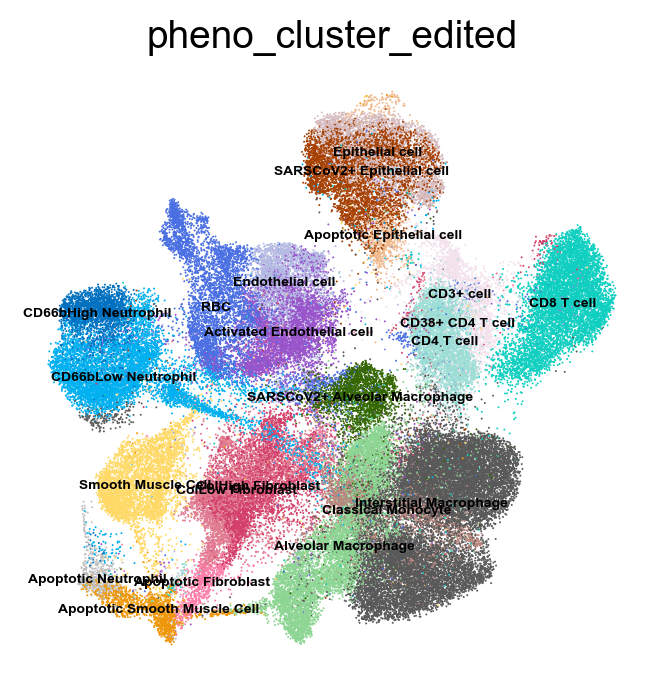

In [7]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_subset3, color = "pheno_cluster_edited", palette = colour_palette['colour2'], legend_fontsize = 5, legend_loc='on data', legend_fontweight='bold', size=2, frameon=False, save='_all_clusters.pdf')

#Plot PhenoGraph on tSNE
#sc.pl.tsne(adata_subset3, color = "pheno_cluster", legend_fontsize = 10, size=2, save='_all_clusters.pdf')

In [ ]:
#Plot PhenoGraph on UMAP
sc.pl.umap(adata_subset3, color = "Type", title='', legend_fontsize = 12, legend_loc='right margin', legend_fontweight='light', size=2, frameon=False, save='_cell_type.pdf')
#Plot PhenoGraph on tSNE
sc.pl.tsne(adata_subset3, color = "cell_type", legend_loc='on data', title='', legend_fontsize = 10, size=2, save='_cell_type.pdf')

In [ ]:
col_df = pd.read_csv('mikeimc_approach/colours/pheno_colours.csv')
colour_palette = col_df.set_index('pheno_cluster').to_dict()
colour_palette['colour']

In [ ]:
#see how to increase the size of the dots
#edit dict colour
graph = sb.lmplot(data = adata_subset3.obs, x = 'X_loc',y='Y_loc',hue ='pheno_cluster', palette = colour_palette['colour'], height = 8, col = 'ROI', col_wrap = 4,fit_reg = False)

In [ ]:
graph.savefig('Mapped_all_clusters.png')

# Export data

In [7]:
adata_subset4.write('adata_subset4')

In [12]:
## Save the binary connectivity matrix
knn_adjacency = adata_subset4.obsp["connectivities"]

In [13]:
knn_adjacency

<77314x77314 sparse matrix of type '<class 'numpy.float32'>'
	with 11641336 stored elements in Compressed Sparse Row format>

In [ ]:
#Make a simplified dataframe to export
adata_export = adata_subset3.obs[['Case','ROI','Type','hierarchy','pheno_cluster']].copy()

In [ ]:
#Split up the X and Y columns from the adata
adata_export['X'], adata_export['Y'] = np.split(adata_subset3.obsm['spatial'],[-1],axis=1)
#Save to file
adata_export.to_csv('adata_cluster_export.csv')

In [ ]:
# export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
adata_subset3.write_csvs(dirname='./', skip_data=False)